In [175]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, ClassifierMixin


In [47]:
df = pd.read_csv("Data/train.csv")

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
df.shape[0]

891

In [50]:
df.replace('?', pd.NA, inplace = True)

In [51]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [53]:
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visualize the missing data distribution using a heatmap or bar chart. 

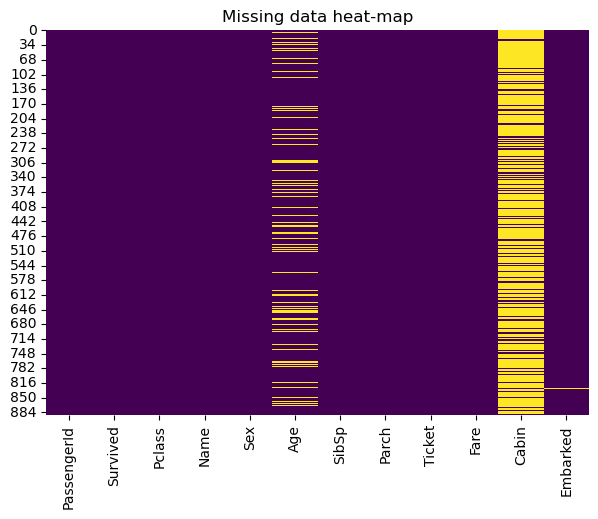

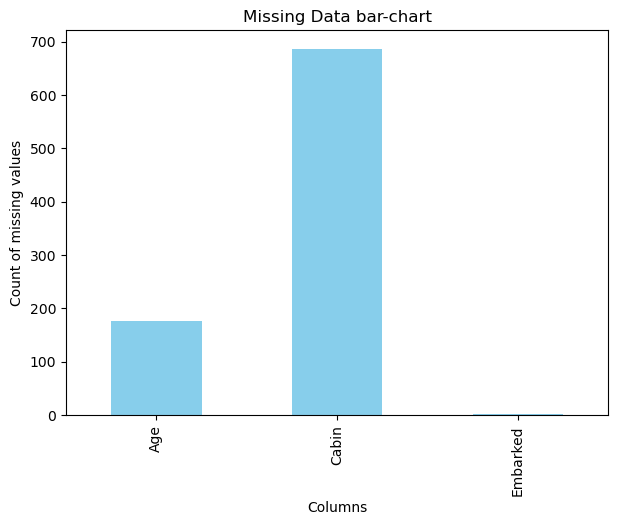

In [54]:
plt.figure(figsize = (7,5))
sns.heatmap(df.isnull(), cbar = False, cmap = "viridis")
plt.title("Missing data heat-map")
plt.show()


missing_data = df.isnull().sum()
missing_data = missing_data[missing_data>0]

plt.figure(figsize = (7,5))
missing_data.plot(kind = 'bar', color = 'skyblue')
plt.title("Missing Data bar-chart")
plt.ylabel("Count of missing values")
plt.xlabel("Columns")
plt.show()



In [55]:
((df["Cabin"].isnull().sum()/df.shape[0])*100)

77.10437710437711

### Should I now delete the column "cabin" as it has around 77% of missing values?

### Correlation with the target?

In [59]:
df["deck"] = df["Cabin"].str[0]

df[["deck", "Survived"]].groupby("deck").mean().reset_index()

,deck,Survived
0,A,0.466667
1,B,0.744681
2,C,0.593220
3,D,0.757576
4,E,0.750000
5,F,0.615385
6,G,0.500000
7,T,0.000000


Since Deck column is contributing at a significant proportion to the Target feature. It is better to keep it. 

In [60]:
df["deck"] = df["deck"].fillna("unknown")

In [61]:
df = df.drop(["Cabin", "PassengerId", "Name"], axis = 1)

In [62]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,deck
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,unknown
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,unknown
3,1,1,female,35.0,1,0,113803,53.1000,S,C
4,0,3,male,35.0,0,0,373450,8.0500,S,unknown
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,unknown
887,1,1,female,19.0,0,0,112053,30.0000,S,B
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,unknown
889,1,1,male,26.0,0,0,111369,30.0000,C,C


In [63]:
#Imputing Missing value in age with Median

df["Age"] = df["Age"].fillna(df["Age"].median())

In [64]:
#Imputing Null values in Embarked with most freq values

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

# 2. Encoding Categorical Variables

In [65]:
df["Sex"] = df["Sex"].map({"male": 1, "female": 0})


In [66]:
one_hot = pd.get_dummies(df["Embarked"], prefix = "is_")

df_ = pd.concat([df, one_hot], axis = 1)
df = df_.drop("Embarked", axis = 1)

In [67]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,deck,is__C,is__Q,is__S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,C,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,unknown,0,0,1
887,1,1,0,19.0,0,0,112053,30.0000,B,0,0,1
888,0,3,0,28.0,1,2,W./C. 6607,23.4500,unknown,0,0,1
889,1,1,1,26.0,0,0,111369,30.0000,C,1,0,0


# Compare the distributions of Min-Max Scaling and Standardization

In [68]:
min_max = MinMaxScaler()
stds = StandardScaler()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   deck      891 non-null    object 
 9   is__C     891 non-null    uint8  
 10  is__Q     891 non-null    uint8  
 11  is__S     891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [70]:
Numerical_cols = df.select_dtypes(include = ["int64", "float64"]).columns

In [71]:
standard_df = df[Numerical_cols].copy()
standard_df.loc[:,:] = stds.fit_transform(df[Numerical_cols])

In [72]:
standard_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854
3,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730
4,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337
...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,0.737695,-0.181487,-0.474545,-0.473674,-0.386671
887,1.266990,-1.566107,-1.355574,-0.796286,-0.474545,-0.473674,-0.044381
888,-0.789272,0.827377,-1.355574,-0.104637,0.432793,2.008933,-0.176263
889,1.266990,-1.566107,0.737695,-0.258337,-0.474545,-0.473674,-0.044381


In [26]:
mm_df = df[Numerical_cols].copy()
mm_df.loc[:,:] = min_max.fit_transform(df[Numerical_cols])
mm_df

/var/folders/4w/x20vvvw12qv75l7cr78cr3f00000gn/T/ipykernel_3416/955684569.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  mm_df.loc[:,:] = min_max.fit_transform(df[Numerical_cols])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0.0,1.0,1.0,0.271174,0.125,0.000000,0.014151
1,1.0,0.0,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,1.0,0.0,0.321438,0.000,0.000000,0.015469
3,1.0,0.0,0.0,0.434531,0.125,0.000000,0.103644
4,0.0,1.0,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...
886,0.0,0.5,1.0,0.334004,0.000,0.000000,0.025374
887,1.0,0.0,0.0,0.233476,0.000,0.000000,0.058556
888,0.0,1.0,0.0,0.346569,0.125,0.333333,0.045771
889,1.0,0.0,1.0,0.321438,0.000,0.000000,0.058556


In [27]:
mm_df["Survived"] = mm_df["Survived"].astype(int)

def Histogram(dataframe, df_name):
    
    
    if df_name == "mm_df":
        print("Histogram on Min-Max Normalised Dataset")
    elif df_name == "standard_df":
        print("Histogram on Standardises dataset")
        
        
    for i in dataframe.columns:
        
        plt.hist(dataframe[i])
        plt.title(f"Histogram of {i}")
        plt.show()
    



Histogram on Min-Max Normalised Dataset


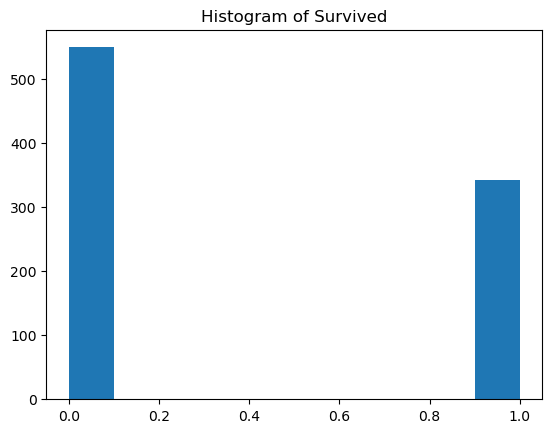

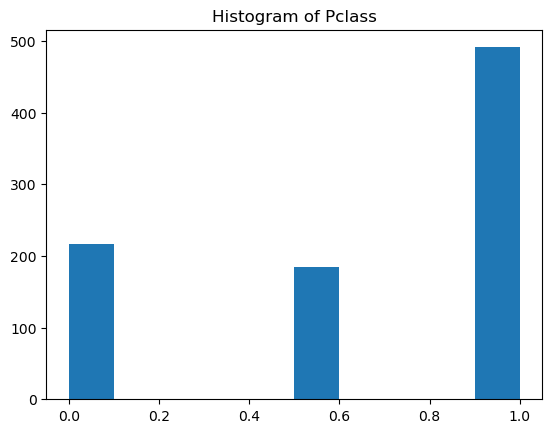

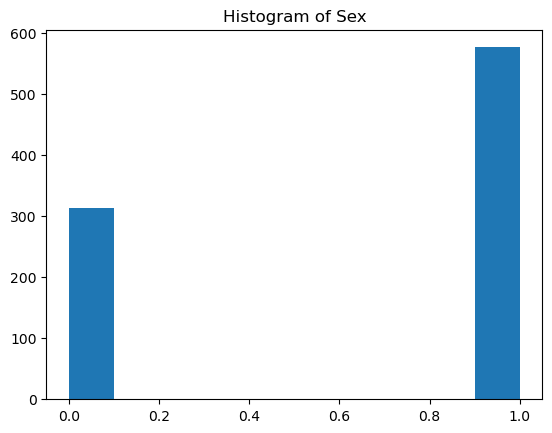

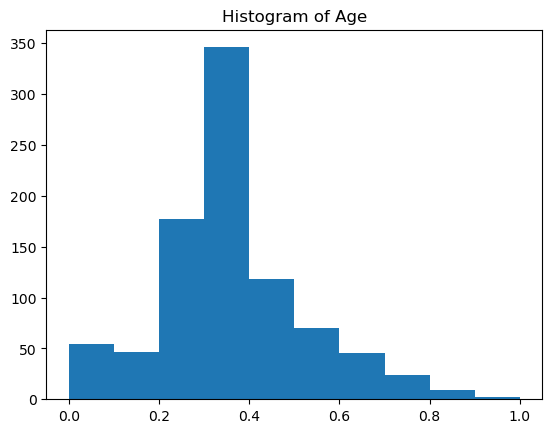

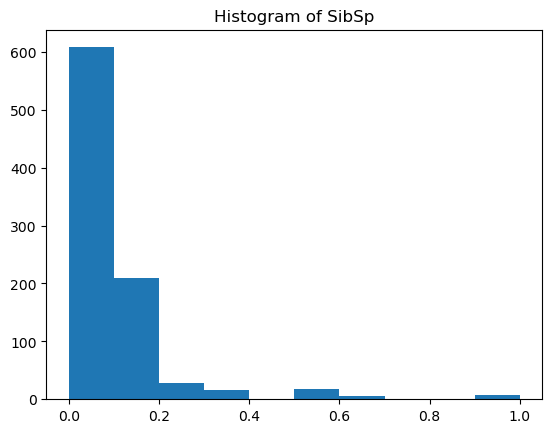

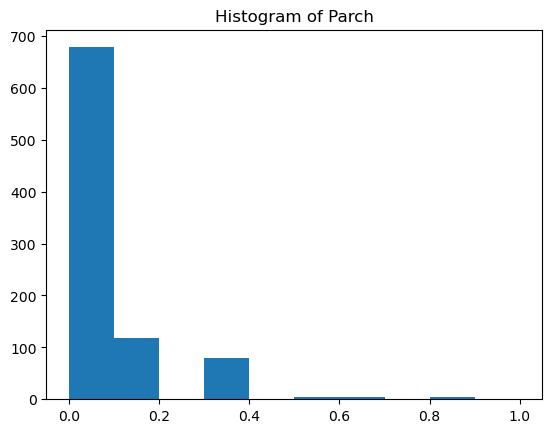

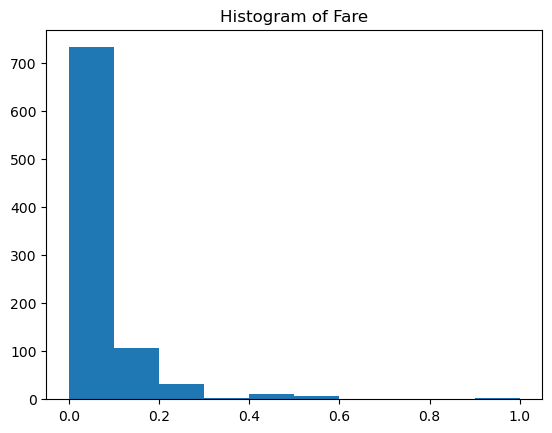

Histogram on Standardises dataset


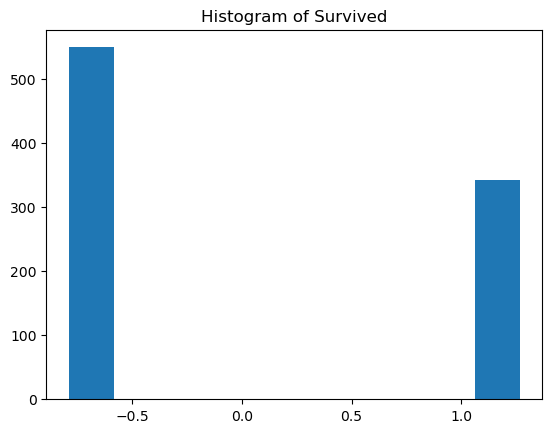

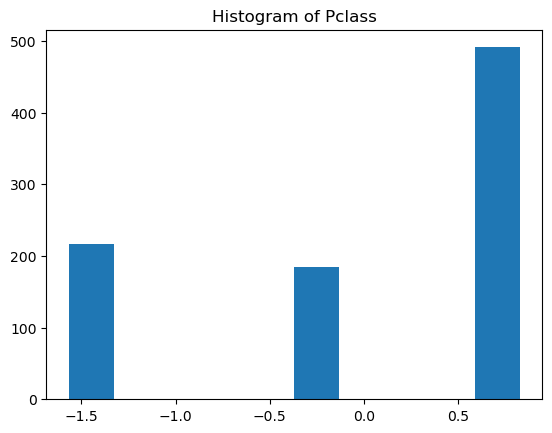

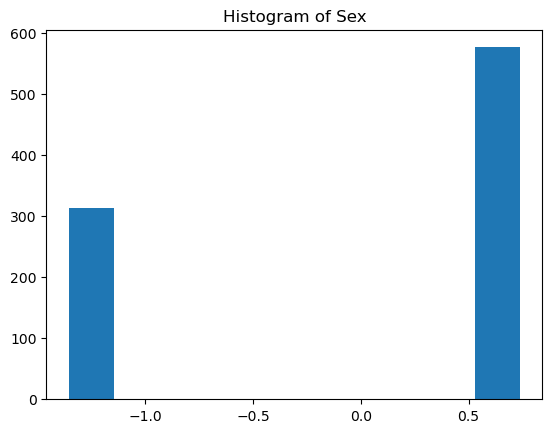

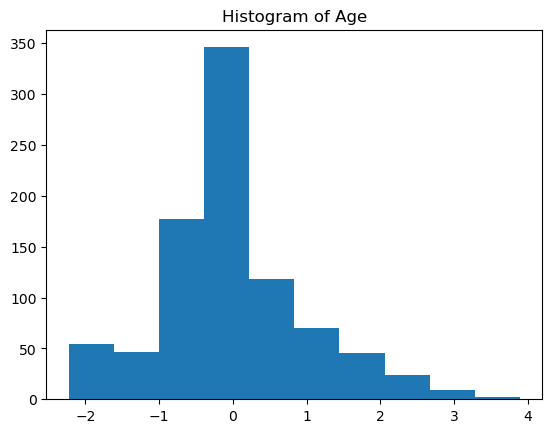

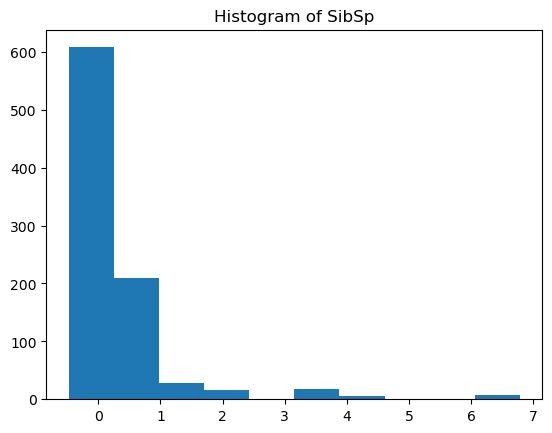

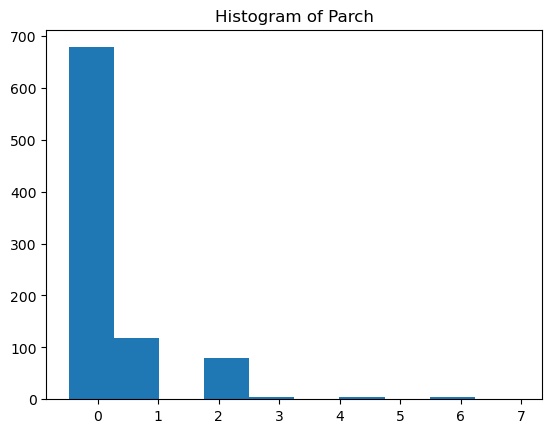

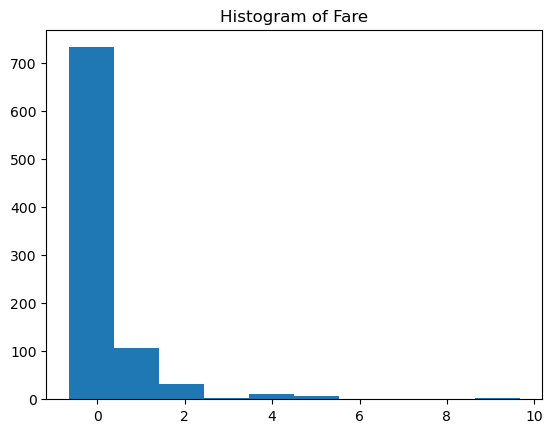

In [28]:
Histogram(mm_df, "mm_df")
Histogram(standard_df, "standard_df")

# Pipeline

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   deck      891 non-null    object 
 9   is__C     891 non-null    uint8  
 10  is__Q     891 non-null    uint8  
 11  is__S     891 non-null    uint8  
dtypes: float64(2), int64(5), object(2), uint8(3)
memory usage: 65.4+ KB


In [73]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,deck,is__C,is__Q,is__S
0,0,3,1,22.0,1,0,A/5 21171,7.2500,unknown,0,0,1
1,1,1,0,38.0,1,0,PC 17599,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,unknown,0,0,1
3,1,1,0,35.0,1,0,113803,53.1000,C,0,0,1
4,0,3,1,35.0,0,0,373450,8.0500,unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13.0000,unknown,0,0,1
887,1,1,0,19.0,0,0,112053,30.0000,B,0,0,1
888,0,3,0,28.0,1,2,W./C. 6607,23.4500,unknown,0,0,1
889,1,1,1,26.0,0,0,111369,30.0000,C,1,0,0


In [74]:
df = df.drop([ "Ticket"], axis = 1)


In [75]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,deck,is__C,is__Q,is__S
0,0,3,1,22.0,1,0,7.2500,unknown,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,unknown,0,0,1
3,1,1,0,35.0,1,0,53.1000,C,0,0,1
4,0,3,1,35.0,0,0,8.0500,unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,unknown,0,0,1
887,1,1,0,19.0,0,0,30.0000,B,0,0,1
888,0,3,0,28.0,1,2,23.4500,unknown,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,1,0,0


In [35]:
num_cols = df.select_dtypes(include = ["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include = ["object"]).columns.tolist()

In [36]:
num_cols.remove("Survived")

In [37]:
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('scalar', StandardScaler())
])

In [38]:
Categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

In [39]:
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, num_cols),
    ('cat', Categorical_pipeline, cat_cols)
])

In [40]:
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [41]:
X = df.drop("Survived", axis = 1)
y = df["Survived"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['deck'])])),
                ('classifier', LogisticRegression())])

In [44]:
score = pipeline.score(X_test, y_test)
print(f"Model accuracy: {score}")

Model accuracy: 0.8100558659217877


In [45]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,deck,is__C,is__Q,is__S
0,0,3,1,22.0,1,0,7.2500,unknown,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,unknown,0,0,1
3,1,1,0,35.0,1,0,53.1000,C,0,0,1
4,0,3,1,35.0,0,0,8.0500,unknown,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,unknown,0,0,1
887,1,1,0,19.0,0,0,30.0000,B,0,0,1
888,0,3,0,28.0,1,2,23.4500,unknown,0,0,1
889,1,1,1,26.0,0,0,30.0000,C,1,0,0


# Pipeline

In [86]:
num_cols = df.select_dtypes(include= ["float64", "int64", "uint8"]).columns.tolist()

In [112]:
num_cols.remove("Survived")

In [88]:
cat_cols = df.select_dtypes(include = ["object"]).columns.tolist()

In [113]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = 'median')),
    ("standadiser", StandardScaler())
])

cat_pipeline = Pipeline([
    ('Imputer', SimpleImputer(strategy = "most_frequent")),
    ('encoder', OneHotEncoder(handle_unknown= "ignore"))
])

In [114]:
preprocessor = ColumnTransformer([
    ("num_cols", num_pipeline, num_cols),
    ("cat_cols", cat_pipeline, cat_cols)
])

In [115]:
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

In [180]:
class LogisticReg(BaseEstimator, ClassifierMixin):
    
    def __init__(self, learning_rate = 1000, alpha = 0.01):
        
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.cost_list = []
        self.lr_list = []
        self.theta = None
        
        
    def fit(self, X, y):
        
        X = np.c_[X, np.ones(X.shape[0])]
        self.theta = np.zeros(X.shape[1])
        
        m = X.shape[0]
        for i in range(self.learning_rate):
            
            z = np.dot(X, self.theta)
            h_x = 1/(1+ np.exp(-z))
            
            cost = (-1/m)* np.sum((y* np.log(h_x)) + ((1-y)* np.log(1 - h_x)))
            grad = (1/m)*np.dot(X.T, (h_x - y))
            
            self.theta -= self.alpha* grad
            
            self.cost_list.append(cost)
            self.lr_list.append(i)
            
        return self
        
    
    def predict(self, X):
        
        X = np.c_[X, np.ones(X.shape[0])]
        z = np.dot(X, self.theta)
        y = 1/(1+ np.exp(-z))
        
        return (y >= 0.5).astype(int)
    
    
    def get_costlist(self):
        return self.cost_list
    
    def get_lr_list(self):
        return self.lr_list
            
            
            
            
            
            
    
    

In [182]:
pipeline = Pipeline([
    
    ("preprocessor", preprocessor),
    ("Model", LogisticReg())
])

In [225]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num_cols',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standadiser',
                                                                   StandardScaler())]),
                                                  ['Pclass', 'Sex', 'Age',
                                                   'SibSp', 'Parch', 'Fare',
                                                   'is__C', 'is__Q', 'is__S']),
                                                 ('cat_cols',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['deck'])])),
                ('Model', LogisticReg())])

In [197]:
y_test_pred = pipeline.predict(X_test)

In [198]:
score = pipeline.score(X_test, y_test)

In [199]:
score

0.7988826815642458

In [222]:
cost_list = pipeline.named_steps["Model"].get_costlist()
lr_list = pipeline.named_steps["Model"].get_lr_list()

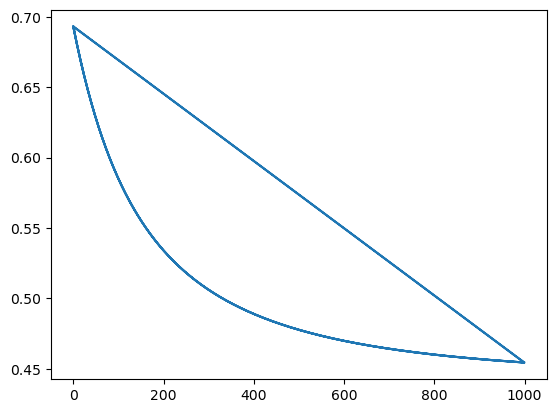

In [213]:

plt.plot(lr_list, cost_list )
plt.show()

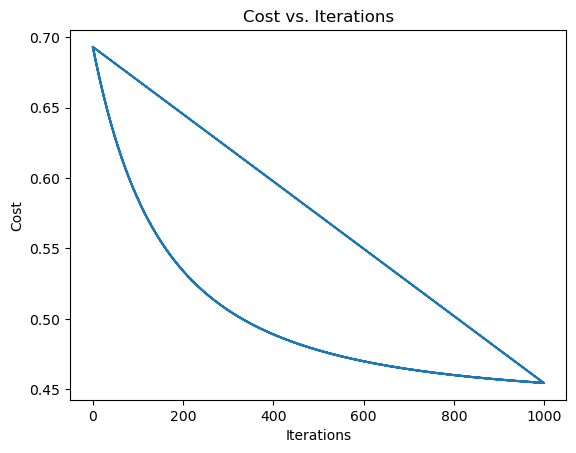

In [214]:
import matplotlib.pyplot as plt

plt.plot(lr_list, cost_list)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs. Iterations")
plt.show()

In [226]:
len(cost_list)

5000

In [227]:
len(lr_list)

5000